In [1]:

try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Concatenate, Flatten
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 8.3MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219267 sha256=eade8da3c8a7972f8952d31b84049f3344789fe21c07a2da751169beec20924e
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(5)
print('The data used will be:')
df_train[['Human','Yersinia']]

The data used will be:


,Human,Yersinia
0,"[MKDKQ, KDKQK, DKQKK, KQKKK, QKKKK, KKKKE, KKK...","[MAKAS, AKASR, KASRH, ASRHN, SRHNL, RHNLS, HNL..."
1,"[MSWSG, SWSGL, WSGLL, SGLLH, GLLHG, LLHGL, LHG...","[MQHVT, QHVTG, HVTGS, VTGSK, TGSKR, GSKRR, SKR..."
2,"[MSLFD, SLFDL, LFDLF, FDLFR, DLFRG, LFRGF, FRG...","[MAELP, AELPA, ELPAK, LPAKR, PAKRR, AKRRF, KRR..."
3,"[MAVAP, AVAPR, VAPRL, APRLF, PRLFG, RLFGG, LFG...","[MRIFA, RIFAI, IFAIS, FAISC, AISCS, ISCSS, SCS..."
4,"[MSTIQ, STIQS, TIQSE, IQSET, QSETD, SETDC, ETD...","[MSYAF, SYAFP, YAFPG, AFPGT, FPGTF, PGTFP, GTF..."
...,...,...
6265,"[MSYFG, SYFGE, YFGEH, FGEHF, GEHFW, EHFWG, HFW...","[MITTD, ITTDG, TTDGN, TDGNS, DGNSA, GNSAV, NSA..."
6266,"[MTVGK, TVGKS, VGKSS, GKSSK, KSSKM, SSKML, SKM...","[MSQPP, SQPPF, QPPFW, PPFWQ, PFWQQ, FWQQK, WQQ..."
6267,"[MNNLS, NNLSF, NLSFS, LSFSE, SFSEL, FSELC, SEL...","[MSEDR, SEDRH, EDRHQ, DRHQQ, RHQQR, HQQRQ, QQR..."
6268,"[MAPEI, APEIN, PEINL, EINLP, INLPG, NLPGP, LPG...","[MKNLS, KNLSF, NLSFV, LSFVA, SFVAG, FVAGL, VAG..."


Median length of Joined sequence is 873


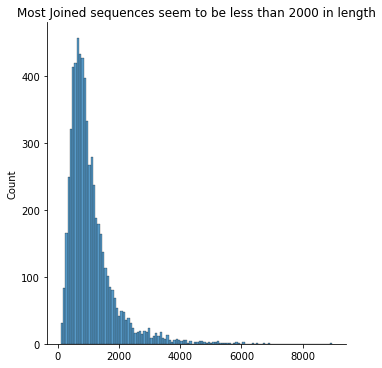

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = f.sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 500000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 5818
min sequence_data length: 29
median sequence_data length: 585


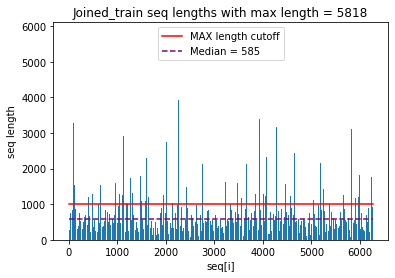

max word index: 499999
Found 1562791 unique tokens.
pre padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 4978
min sequences_test length: 53
median sequences_test length: 518


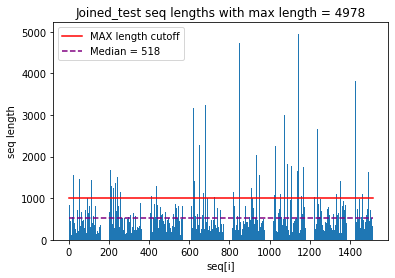

pre padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 500000


In [3]:
data_5D_join_pre,data_test_5D_join_pre,num_words_5D_join,MAX_SEQUENCE_LENGTH_5D,MAX_VOCAB_SIZE_5D = f.get_seq_data_join(500000,1000,df_train,df_test,pad='pre',show = True)

In [ ]:
data_5D_join_center,data_test_5D_join_center,num_words_5D_join,MAX_SEQUENCE_LENGTH_5D,MAX_VOCAB_SIZE_5D = f.get_seq_data_join(500000,1000,df_train,df_test,pad='center')

MAX_VOCAB_SIZE is 500000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 5818
min sequence_data length: 29
median sequence_data length: 585
max word index: 499999
Found 1562791 unique tokens.
Center padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 4978
min sequences_test length: 53
median sequences_test length: 518
Center padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 500000


In [ ]:
data_5D_join_post,data_test_5D_join_post,num_words_5D_join,MAX_SEQUENCE_LENGTH_5D,MAX_VOCAB_SIZE_5D = f.get_seq_data_join(500000,1000,df_train,df_test,pad='post')

MAX_VOCAB_SIZE is 500000
MAX_SEQUENCE_LENGTH is 1000
max sequence_data length: 5818
min sequence_data length: 29
median sequence_data length: 585
max word index: 499999
Found 1562791 unique tokens.
post padding.
Shape of data tensor: (6270, 1000)
max sequences_test length: 4978
min sequences_test length: 53
median sequences_test length: 518
post padding for test seq.
Shape of data_test tensor: (1514, 1000)
num_words is 500000


In [ ]:
EMBEDDING_DIM_5D = 10
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10
DROP = 0.5
x1 = f.conv_model(MAX_SEQUENCE_LENGTH_5D,EMBEDDING_DIM_5D,num_words_5D_join,DROP)
x2 = f.conv_model(MAX_SEQUENCE_LENGTH_5D,EMBEDDING_DIM_5D,num_words_5D_join,DROP)
x3 = f.conv_model(MAX_SEQUENCE_LENGTH_5D,EMBEDDING_DIM_5D,num_words_5D_join,DROP)
concatenator = Concatenate(axis=1)
x = concatenator([x1.output, x2.output, x3.output])
x = Dense(128)(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model5D_CNN_join = Model(inputs=[x1.input, x2.input, x3.input], outputs=output)

model5D_CNN_join.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

trains = [data_5D_join_pre,data_5D_join_center,data_5D_join_post]
tests = [data_test_5D_join_pre,data_test_5D_join_center,data_test_5D_join_post]

model5D_CNN_join.fit(trains, df_train['label'].values, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(tests,df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model5D_CNN_join.predict(tests)))

Epoch 1/10
49/49 [==============================] - 11s 193ms/step - loss: 0.6040 - accuracy: 0.6804 - val_loss: 0.4952 - val_accuracy: 0.7701
Epoch 2/10
49/49 [==============================] - 9s 191ms/step - loss: 0.3521 - accuracy: 0.8580 - val_loss: 0.4590 - val_accuracy: 0.8032
Epoch 3/10
49/49 [==============================] - 9s 188ms/step - loss: 0.0474 - accuracy: 0.9860 - val_loss: 0.5141 - val_accuracy: 0.8085
Epoch 4/10
49/49 [==============================] - 9s 190ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.5610 - val_accuracy: 0.8269
Epoch 5/10
49/49 [==============================] - 9s 190ms/step - loss: 0.0019 - accuracy: 0.9999 - val_loss: 0.6338 - val_accuracy: 0.8263
Epoch 6/10
49/49 [==============================] - 9s 190ms/step - loss: 0.0039 - accuracy: 0.9997 - val_loss: 0.6779 - val_accuracy: 0.8230
Epoch 7/10
49/49 [==============================] - 9s 189ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.6797 - val_accuracy: 0.8118
Epoch

In [ ]:
#model5D_join.save('/content/drive/MyDrive/ML_Data/model5D_join.h5')